In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch

In [3]:
df = pd.read_csv('customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28.0,Clothing,5.0,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21.0,Shoes,3.0,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20.0,Clothing,1.0,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66.0,Shoes,5.0,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53.0,Books,4.0,60.60,Cash,24/10/2021,Kanyon


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13809 entries, 0 to 13808
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      13809 non-null  object 
 1   customer_id     13809 non-null  object 
 2   gender          13808 non-null  object 
 3   age             13808 non-null  float64
 4   category        13808 non-null  object 
 5   quantity        13808 non-null  float64
 6   price           13808 non-null  float64
 7   payment_method  13808 non-null  object 
 8   invoice_date    13808 non-null  object 
 9   shopping_mall   13808 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


,0
invoice_no,0
customer_id,0
gender,1
age,1
category,1
quantity,1
price,1
payment_method,1
invoice_date,1
shopping_mall,1


In [5]:
df.dropna(inplace=True)

In [6]:
df_clustering = df.select_dtypes(include=[np.number])
df_clustering.head()

,age,quantity,price
0,28.0,5.0,1500.40
1,21.0,3.0,1800.51
2,20.0,1.0,300.08
3,66.0,5.0,3000.85
4,53.0,4.0,60.60


In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clustering)

In [8]:
X_train, X_test = train_test_split(data_scaled, test_size=0.3, random_state=42)

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels_train = kmeans.fit_predict(X_train)
silhouette_kmeans_train = silhouette_score(X_train, kmeans_labels_train)
print(f'Silhouette Score for K-Means (Train): {silhouette_kmeans_train:.2f}')

Silhouette Score for K-Means (Train): 0.31


In [10]:
kmeans_labels_test = kmeans.predict(X_test)
silhouette_kmeans_test = silhouette_score(X_test, kmeans_labels_test)
print(f'Silhouette Score for K-Means (Test): {silhouette_kmeans_test:.2f}')

Silhouette Score for K-Means (Test): 0.30


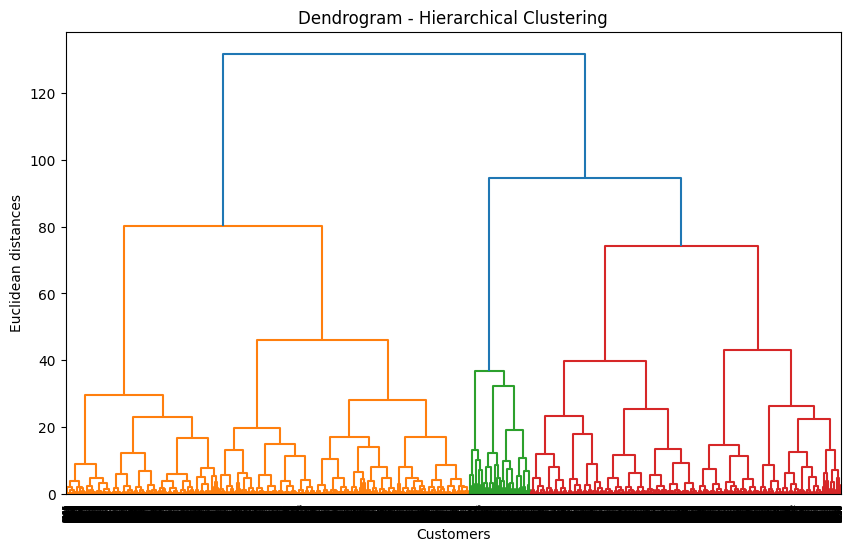

In [11]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_train, method='ward'))
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()


In [13]:
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels_train = hierarchical.fit_predict(X_train)
silhouette_hier_train = silhouette_score(X_train, hierarchical_labels_train)
print(f'Silhouette Score for Hierarchical Clustering (Train): {silhouette_hier_train:.2f}')

Silhouette Score for Hierarchical Clustering (Train): 0.30


In [15]:
hierarchical_test = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels_test = hierarchical_test.fit_predict(X_test)
silhouette_hier_test = silhouette_score(X_test, hierarchical_labels_test)
print(f'Silhouette Score for Hierarchical Clustering (Test): {silhouette_hier_test:.2f}')

Silhouette Score for Hierarchical Clustering (Test): 0.28


In [26]:
# for test
cluster_names = {
    0: "Low Spenders",
    1: "High Value Customers",
    2: "Average Shoppers"
}
new_customer = np.array([[10, 1, 1]])
new_customer_scaled = scaler.transform(new_customer)
cluster = kmeans.predict(new_customer_scaled)
print(f"The new customer belongs to cluster: {cluster_names[cluster[0]]}")

The new customer belongs to cluster: Average Shoppers


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
